In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#---------Load the Dataset------

url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)
df

In [ ]:
#-----Basic Structure------

# Show first few rows
print(df.head())

# Number of rows and columns
df.shape
print("Shape of data:", df.shape)

# Info about columns
print(df.info())

# Summary statistics
print(df.describe())

In [ ]:
#------Data Exploration ------

# Number of unique Campaign_ID values in the dataset.
print("Number of unique Campaign_ID values:", df["Campaign_ID"].nunique())

# Unique values of the Location and Customer_Segment columns.
print("Unique Locations:", df["Location"].unique())
print("Unique Customer Segments:", df["Customer_Segment"].unique())

#  Occurrences of each category in the Campaign_Type and Channel_Used and columns.
print("Campaign_Type counts:\n", df["Campaign_Type"].value_counts())
print("\nChannel_Used counts:\n", df["Channel_Used"].value_counts())


In [ ]:
#-----Exploratory Data Analysis (EDA) and Visualization -------

# Campaign Performance

# Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Acquisition_Cost", y="ROI", alpha=0.6)
plt.title("Acquisition Cost vs ROI")
plt.show()

# Bar Plot
avg_conv = df.groupby(["Channel_Used","Campaign_Type"])["Conversion_Rate"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=avg_conv, x="Channel_Used", y="Conversion_Rate", hue="Campaign_Type")
plt.title("Average Conversion Rate by Channel & Campaign Type")
plt.show()

# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Campaign_Type", y="Engagement_Score")
plt.title("Engagement Score by Campaign Type")
plt.show()

# Bar Plot
avg_roi = df.groupby("Company")["ROI"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=avg_roi, x="Company", y="ROI")
plt.title("Average ROI by Company")
plt.ylabel("ROI")
plt.show()

# Heat Map
corr = df[["Engagement_Score","Conversion_Rate"]].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#-------Customer Segmentation-------

# Count Plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Target_Audience", order=df["Target_Audience"].value_counts().index)
plt.title("Distribution of Target Audience")
plt.show()

# Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Language", y="Conversion_Rate", hue="Customer_Segment")
plt.title("Conversion Rate by Language & Customer Segment")
plt.show()

# Box Plot
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Customer_Segment", y="Acquisition_Cost", hue="Channel_Used")
plt.title("Acquisition Cost by Customer Segment & Channel")
plt.show()

# Bar Chart
avg_lang = df.groupby("Language")["Conversion_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
avg_lang.plot(kind="bar")
plt.title("Average Conversion Rate by Language")
plt.show()



In [ ]:
#-------Channel Effectiveness------

# Bar Chart
avg_eng = df.groupby(["Channel_Used","Campaign_Type"])["Engagement_Score"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=avg_eng, x="Channel_Used", y="Engagement_Score", hue="Campaign_Type")
plt.title("Engagement Score by Channel & Campaign Type")
plt.show()

# Pie Chart
labels = roi_channel.index
sizes = roi_channel.values
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")  # simple pie chart
plt.title("ROI Share by Channel")
plt.show()

# Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Impressions", y="Clicks", hue="Channel_Used", alpha=0.6)
plt.title("Clicks vs Impressions by Channel")
plt.show()

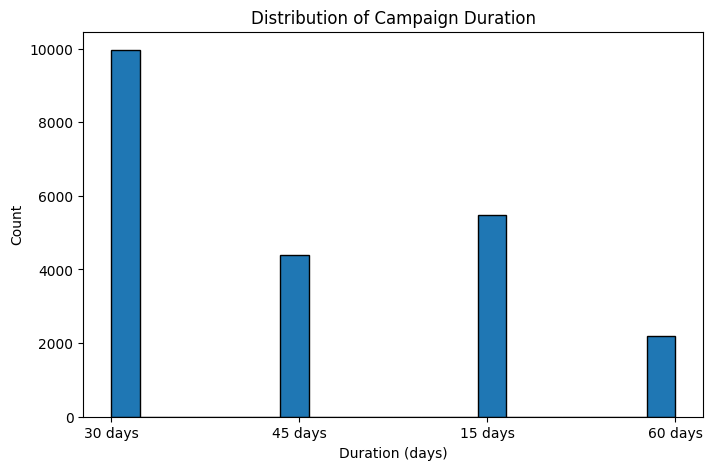

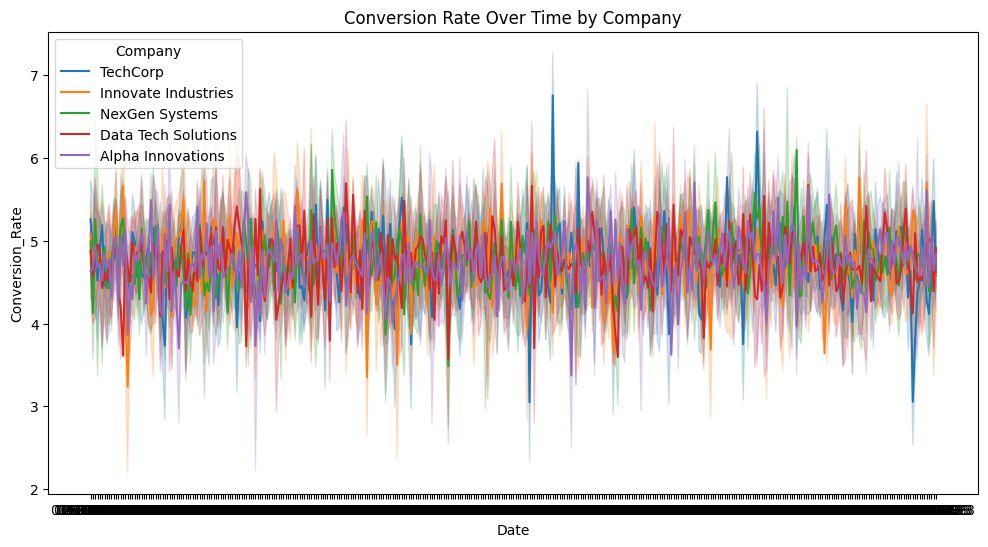

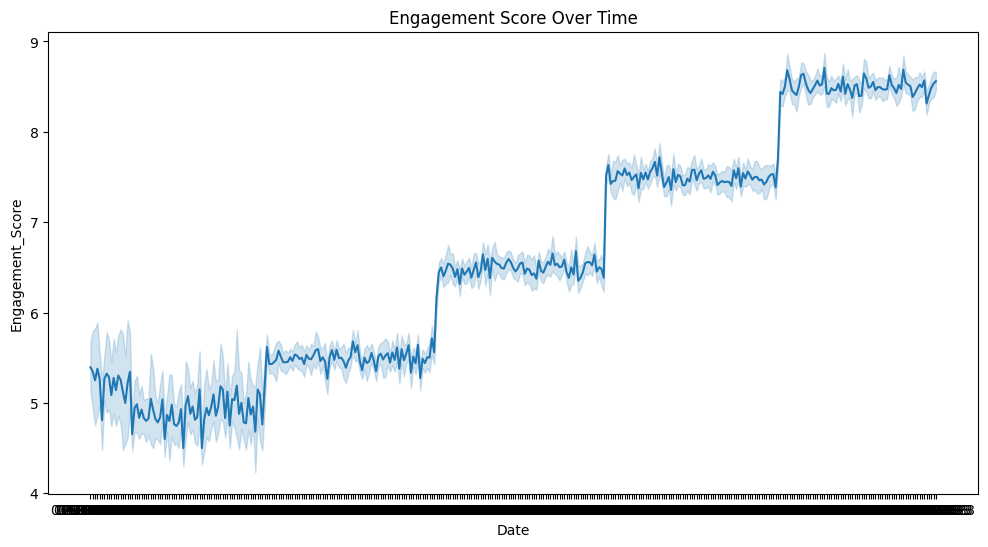

In [64]:
#-----Time Base Analysis-----

# Histogram
plt.figure(figsize=(8,5))
plt.hist(df["Duration"], bins=20, edgecolor="black")
plt.title("Distribution of Campaign Duration")
plt.xlabel("Duration (days)")
plt.ylabel("Count")
plt.show()

# Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Conversion_Rate", hue="Company")
plt.title("Conversion Rate Over Time by Company")
plt.show()

# Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Engagement_Score")
plt.title("Engagement Score Over Time")
plt.show()

In [ ]:
#------Geographic Analysis------

# Bar Chart
avg_acq_loc = df.groupby("Location")["Acquisition_Cost"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
avg_acq_loc.plot(kind="bar")
plt.title("Average Acquisition Cost by Location")
plt.show()

# Bar Chart
avg_conv_loc = df.groupby(["Location","Target_Audience"])["Conversion_Rate"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=avg_conv_loc, x="Location", y="Conversion_Rate", hue="Target_Audience")
plt.title("Conversion Rate by Location & Target Audience")
plt.show()

# Pie Chart
roi_loc = df.groupby("Location")["ROI"].mean()
plt.figure(figsize=(7,7))
plt.pie(
    roi_loc,
    labels=roi_loc.index,
    autopct="%1.1f%%"
)
plt.title("ROI Share by Location")
plt.show()